# Lab 2

## convolution
There are several operations to manipulate images, one of the most used is convolution. As a reminder, the convolution operation for a __discrete__ signal is defined as: $$[f*g](n)=\sum _{i=-inf}^{+inf} f(i) g(n-i)=\sum _{i=-inf}^{+inf} g(i) f(n-i)$$
In the case of an image, the signal is in 2 dimensions and the formula is rewritten as:
$$[f*g](m,n)=\sum _{i=-inf}^{+inf}\sum _{j=-inf}^{+inf} f(i,j) g(m-i,n-j)=\sum _{i=-inf}^{+inf} g(i,j) f(m-i,n-j)$$

Here, f represents the image that will undergo the operation and g is the so-called __kernel__.

In practice, this mathematical formula is quite simple, as shown in the following image:

![SegmentLocal](./3D_Convolution_Animation.gif "segment")

The kernel is a window that slides over each pixel of the image f. The new pixel obtained is a linear combination of the old pixel and its close neighbors (depending on the dimension of the kernel). The coefficients of the linear combination are the kernel g. When the image is a _grayscale_ image, the operation only needs to be done once, but when it is an RGB image, the operation needs to be applied to each _channel_.

There are some constraints on the kernels used: the dimension of the kernel must be odd and smaller than that of the image (for example 3x3) and we normalize the coefficients of the kernel so that their sum is 0,1 or -1. We also have to decide what happens on the edges, 3 possibilities: duplicate the pixels on the edges to apply the convolution (see image), set these coefficients to 0 or do not convolve on the edges. 

The first use of this convolution operation is the __convolution filter__.


## Convolution Filter
We will implement the convolution operation and test the convolution filter with different kernels to see the results.

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

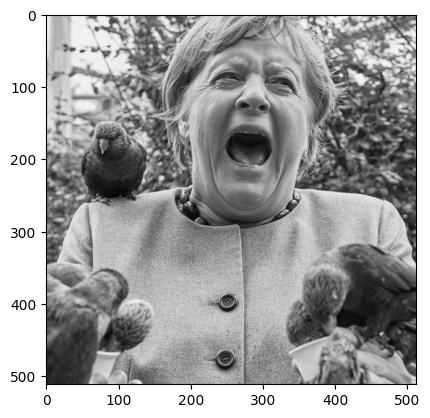

In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return np.uint8(gray)

img = mpimg.imread("Angela.jpg")
gray =rgb2gray(img)

# To display scalar images, imshow uses a colormap (cmap)
plt.imshow(gray,cmap='gray')
plt.show()

## Exercice 1

Define `convolution2D` which applies convolution with kernel `H` on `X`. The result of the convolution is of the same form as `X`. Choose how you want to treat the edge case.

In [3]:
def convolution2D(X,H):
    res = np.empty_like(X)
    res = np.zeros(X.shape)
    cout = 0
    for m in range(X.shape[0]):
        for n in range(X.shape[1]):
            temp = 0
            for i in range(H.shape[0]):
                for j in range(H.shape[1]):
                    if m+(-H.shape[0]//2+i)<0 or n+(-H.shape[1]//2+j)<0 or m+(-H.shape[0]//2+i)>X.shape[0] or n+(-H.shape[1]//2+j)> X.shape[1]:
                        temp+=X[m,n]
                        cout+=1
                    else:
                        temp+=H[i,j]*X[m+(-H.shape[0]//2+i),n+(-H.shape[1]//2+j)]
            res[m,n] = temp
    print(cout)
    return res

def convo2(X,H):
    res = np.empty_like(X)
    res = np.zeros(X.shape)
    for i in range(X.shape[0]-H.shape[0]+1):
        for j in range(X.shape[1]-H.shape[1]+1):
            res[i,j] = np.sum(X[i:i+H.shape[0],j:j+H.shape[1]]*H)
    return res

Once your function is defined, the following code should work

You will find several types of kernel to apply on the image. You can also combine several convolutions one after the other. Don't hesitate to invent some or look for common kernels on the net.

9207


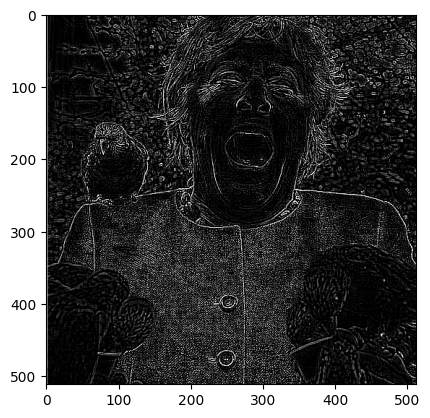

In [4]:
#H=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #sharpening
#H=np.ones((3,3))*1.0/9 #blur
H=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #edge detection

res = convolution2D(gray,H)
#res = convo2(gray,H)
#res = convolution2D(res,H)
#res = convolution2D(res,H)
#res = convolution2D(res,H)

# np.clip allows to crop the values of the array between [0,255]
# which is the range of possible values for pixels
res = np.clip(res, 0, 255)

plt.imshow(res, cmap='gray')
plt.show()

## Scipy

You can calculate convolution operations with `convolve2d` from the `scipy.signal` module which is much faster. The `filter2D` function in OpenCV also allows you to do this.

## Exercice 2

Use one of the predefined functions listed above to perform a convolution.

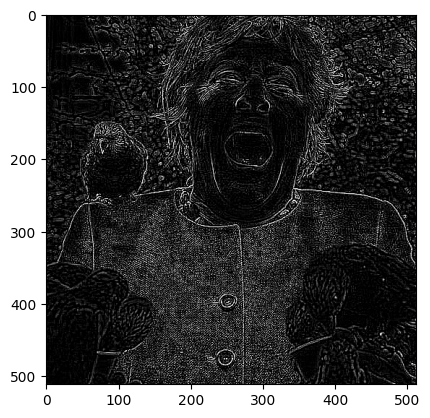

In [5]:
#H=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #sharpening
#H=np.ones((3,3))*1.0/9 #blur
from scipy import signal
import cv2

H=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #edge detection

#res = signal.convolve2d(gray,H)
res = cv2.filter2D(gray,-1,H)

# np.clip allows to crop the values of the array between [0,255]
# which is the range of possible values for pixels
res = np.clip(res, 0, 255)

plt.imshow(res, cmap='gray')
plt.show()

## Binarization

The binarization of an image is to produce an image whose pixels are Booleans. We usually start with an input image and apply a condition on each pixel. The goal is to isolate the object of interest from the image and to obtain `True` pixels for the pixels that belong to it (*foreground*) and `False` pixels for the pixels of the *background*.

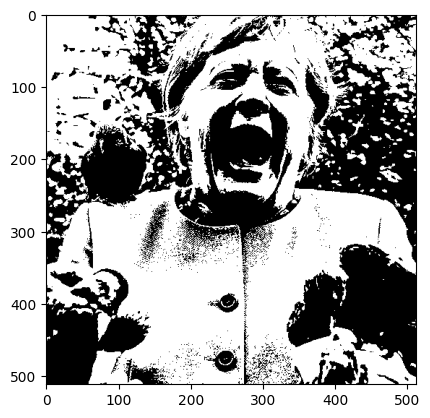

In [6]:
img = mpimg.imread("Angela.jpg")
gray =rgb2gray(img)

# numpy magic !
bin = gray > 128

plt.imshow(bin, cmap='gray')
plt.show()

A binarized image can contain `True` and `False` but also `0` and `1` or `0` and `255`. We will see later that OpenCV doesn't like boolean images very much and that you will have to convert them into 8-bit unsigned integers.

In [7]:
bin = np.uint8(bin)

## Color selection

A common way to binarize is to select a particular color in the image. Beware that two colors visually close are sometimes not very close in RGB space. It is generally recommended to switch to HSV to perform this kind of operation.

In [8]:
img = mpimg.imread("nemo.jpg")

hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

## Exercise 3

Use OpenCV's `inRange` function to select the red color of the image `nemo.jpg`.

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


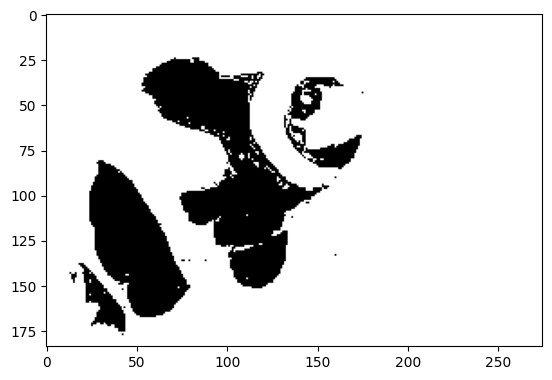

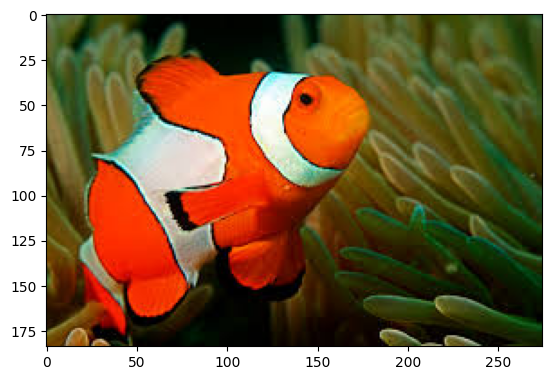

In [9]:
result = cv2.inRange(hsv_img,np.array([0,100,100]),np.array([10,255,255]))
#result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
#result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
res = (255-result)
print(res)
plt.imshow(res,cmap="gray")
plt.show()
plt.imshow(img)
plt.show()

## Labeling

Labeling consists in marking each group of contiguous pixels of the *foreground* with an integer label. The goal is to be able to apply a treatment to each detected object.

The `connectedComponents` function of OpenCV allows to perform a labeling.

## Exercise 4

How many distinct red areas do you get for the image `nemo.jpg` ?

In [10]:
num_labels, labels_im = cv2.connectedComponents(result,connectivity=8)
print(num_labels)

18


## Morphological operations

Morphological operations allow you to manipulate a binary image by making areas of *foreground* grow or shrink. You will find more information in the next page:

[https://docs.opencv.org/4.5.4/d9/d61/tutorial_py_morphological_ops.html](https://docs.opencv.org/4.5.4/d9/d61/tutorial_py_morphological_ops.html)

## Exercise 5

Remove the noise from your binarization of `nemo.jpg` before recounting the red areas.

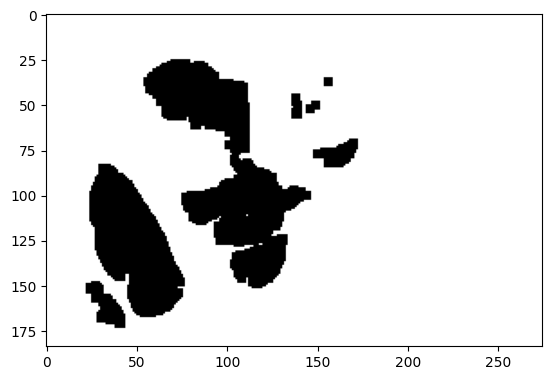

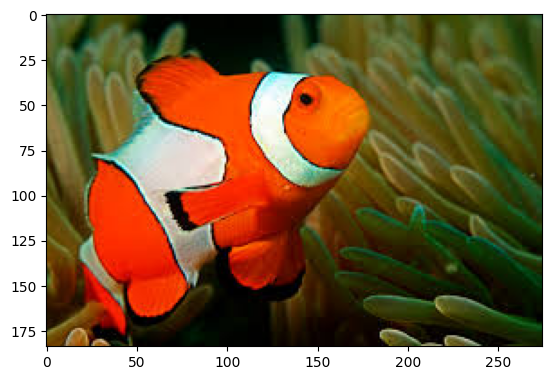

8


In [11]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)

res = (255-opening)

plt.imshow(res,cmap="gray")
plt.show()
plt.imshow(img)
plt.show()

num_labels, labels_im = cv2.connectedComponents(opening,connectivity=8)
print(num_labels)


## Exercise 6

Binarize and label the image `coins.jpg`. How many coins are there. Knowing that there can only be 1€ and 10c coins, write a function that returns the amount of money present in an image of this type.

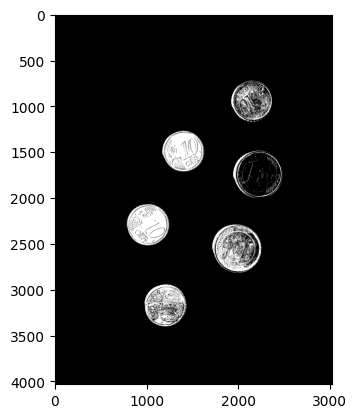

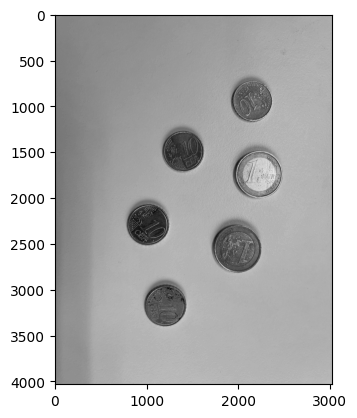

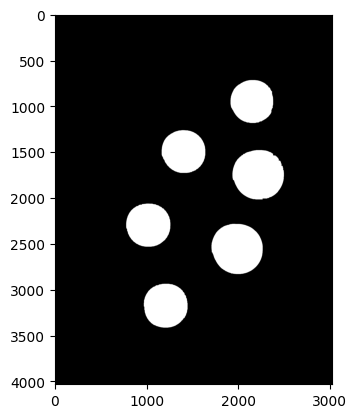

[10996422   173957   176407   239002   181140   242623   183217]
2.4


In [12]:
img = mpimg.imread("coins.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

img = mpimg.imread("coins.jpg")
gray =rgb2gray(img)

#result = cv2.inRange(hsv_img,np.array([20,50,0]),np.array([65,220,250]))
#result = cv2.inRange(hsv_img,np.array([0,90,0]),np.array([255,220,250]))
result = cv2.inRange(gray,0,90)
#result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
#result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
#res = (255-result)

plt.imshow(result,cmap="gray")
plt.show()
plt.imshow(gray,cmap="gray")
plt.show()

kernel = np.ones((8,8),np.uint8)
kernelop = np.ones((30,30),np.uint8)
kernelcl = np.ones((110,110),np.uint8)


#opening = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)
opening = cv2.dilate(result,kernel,iterations = 3)
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernelop)
opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernelcl)
#opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
#opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)


#opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)




plt.imshow(opening,cmap="gray")
plt.show()

num_labels, labels_im = cv2.connectedComponents(opening,connectivity=8)

sizes = np.bincount(labels_im.flatten())

print(sizes)
res = 0
for elem in sizes[1:]:
    if elem > 200000:
        res+= 1
    else:
        res+=0.1
print(res)


# Points of interest

The detection of points of interest is the basis of a large number of algorithms based on image processing. One of the methods used is Harris corner detection. You can find more information on the following page:

[https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

# Exercise 7

Detect the points of interest in the image `chessboard.jpg`.

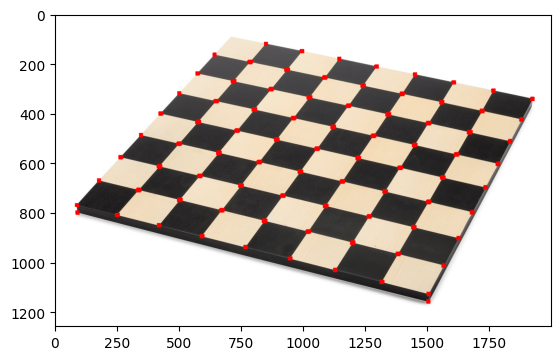

In [13]:
img = mpimg.imread("chessboard.jpg")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray,5,3,.04)
kernel = np.ones((5,5),np.uint8)
dst = cv2.dilate(dst,kernel,iterations = 3)

# Threshold for an optimal value, it may vary depending on the image.

ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)


res = np.zeros_like(img)

res [:,:,:] = img[:,:,:]

res[dst==255]= [255,0,0]
plt.imshow(res)
plt.show()



# Hough transform

The Hough transform is used to detect parametric shapes in an image. It is often used to detect lines or circles. You will find more information on the following page:

[https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)

# Exercise 8

Detect the straight lines in the image `chessboard.jpg`.

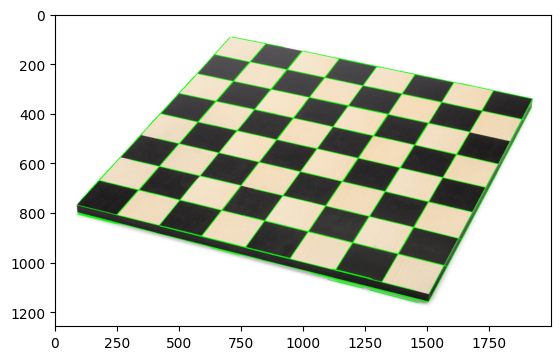

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = mpimg.imread("chessboard.jpg")
#plt.imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,90,apertureSize = 3)

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=80,maxLineGap=20)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

#lines = cv2.HoughLines(edges,1,np.pi/180,200)


# for line in lines:
#     for rho,theta in line:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a*rho
#         y0 = b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*(a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*(a))

#         cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)


#print(lines)
plt.imshow(img)
#plt.show()

# Final exercise

Use the result of the previous lab to flatten the document in the photo `document.jpg`. This time, the detection of the position of the document must be automatic.

In [33]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

def flat(img, points, target_size):

    xw = np.array(points[0])
    yw = np.array(points[1])

    size_x = target_size[0]
    size_y = target_size[1]

    xi = np.array([0,size_x,size_x,0])
    yi = np.array([0,0,size_y,size_y])

    Collumn_Image = np.array([[xi[0]],[yi[0]],[xi[1]],[yi[1]],[xi[2]],[yi[2]],[xi[3]],[yi[3]]])


    x1w,x2w,x3w,x4w = xw[0],xw[1],xw[2], xw[3]
    y1w,y2w,y3w,y4w = yw[0],yw[1],yw[2], yw[3]

    x1i,x2i,x3i,x4i = xi[0],xi[1],xi[2], xi[3]
    y1i,y2i,y3i,y4i = yi[0],yi[1],yi[2], yi[3]



    big = np.array([x1w,y1w,1,0,0,0,-x1i*x1w,-x1i*y1w])
    big = np.vstack((big,np.array([0,0,0,x1w,y1w,1,-y1i*x1w,-y1i*y1w])))
    big = np.vstack((big,np.array([x2w,y2w,1,0,0,0,-x2i*x2w,-x2i*y2w])))
    big = np.vstack((big,np.array([0,0,0,x2w,y2w,1,-y2i*x2w,-y2i*y2w])))
    big = np.vstack((big,np.array([x3w,y3w,1,0,0,0,-x3i*x3w,-x3i*y3w])))
    big = np.vstack((big,np.array([0,0,0,x3w,y3w,1,-y3i*x3w,-y3i*y3w])))
    big = np.vstack((big,np.array([x4w,y4w,1,0,0,0,-x4i*x4w,-x4i*y4w])))
    big = np.vstack((big,np.array([0,0,0,x4w,y4w,1,-y4i*x4w,-y4i*y4w])))

    big = np.linalg.inv(big)

    m = big @ Collumn_Image
    m = np.vstack((m,np.array([1])))

    proj = np.reshape(m,(3,3))

    img_array = np.asarray(img)

    new_img = np.ones((size_y,size_x,3))

    for i in range(size_x):
        for j in range(size_y):
            res = np.linalg.inv(proj) @ (np.array([[i],[j],[1]]))
            new_img[j,i] = img_array[np.round(res[1,0]/res[2,0]).astype(int),np.round(res[0,0]/res[2,0]).astype(int)]
    
    return new_img

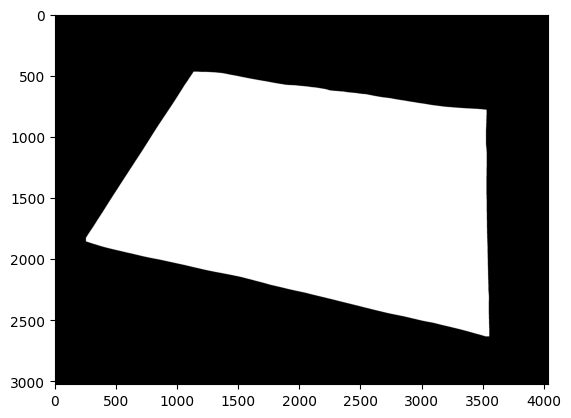

[[1127 3520 3544  246]
 [ 466  774 2626 1851]]


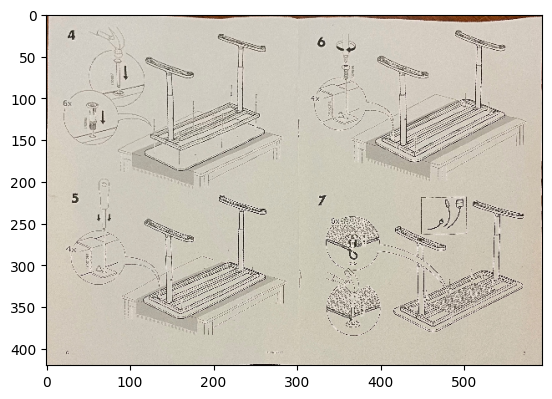

In [39]:
img = mpimg.imread("document.jpg")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel = np.ones((8,8),np.uint8)
kernelop = np.ones((30,30),np.uint8)
kernelcl = np.ones((110,110),np.uint8)

result = cv2.inRange(gray,190,255)
opening = cv2.dilate(result,kernel,iterations = 1)
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernelop)
opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernelcl)

plt.imshow(opening, cmap= "gray")
plt.show()

dst = cv2.cornerHarris(opening,5,3,.04)
kernel = np.ones((5,5),np.uint8)
dst = cv2.dilate(dst,kernel,iterations = 3)

ret, dst = cv2.threshold(dst,0.4*dst.max(),255,0)

dst = np.uint8(dst)

corners = np.argwhere(dst>0)
corners = np.fliplr(corners)
new_corners = np.zeros_like(corners)
for i in range(len(corners)):
    if np.linalg.norm(corners[i] - corners[i-1]) > 20:
        new_corners[i] = [corners[i][0],corners[i][1]]
    else:
        new_corners[i] = 0

new_corners = new_corners[new_corners[:,0] != 0]

new_corners = new_corners[[0,1,3,2]]

new_corners = new_corners.T

print(new_corners)

final = flat(img, new_corners, (297*2,210*2))

res = np.zeros_like(img)

res [:,:,:] = img[:,:,:]

res[dst==255]= [255,0,0]
plt.imshow(final.astype(np.uint8))
plt.show()
